# Data Scientist Salary Analysis Project

## Summary

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Data Science is a fast growing career, which consists of exploring data and creating insights from them in order to assist a company/organization to solve a problem in a variety of sectors. The content of this work are important, not only to those who are just starting on their career path but also to people who are working already in the field or  looking for a career change. 
This way, you will find here important information about the current US market for Data Scientists, how much they earn and wich skills are most demanded from employers. I hope you enjoy it.</p> 

## The Dataset

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>The dataset was made by scrapping the job postings related to the position of 'Data Scientist' from www.glassdoor.com in USA in 2021. After scrapping the raw data, it were removed the duplicated rows from it which reduced the records from 1000 to 742. After this, several simplifications were performed to make the data user friendly for further data analysis and modelling.

Credits: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor</p> 

## Importing the necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [2]:
dataset = pd.read_csv('data_cleaned_2021.csv', sep = ',', index_col = 'index')
pd.set_option('display.max_columns', None)
dataset.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


## Overview of the Data

In [3]:
dataset.shape

(742, 41)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [5]:
dataset.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> However, when we check the values for the 'company_txt' column, we realize that it's possible that some of the data can be duplicated. Let's take a look at an example:</p> 

In [6]:
dataset.query('company_txt == "Reynolds American"')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
417,Scientist Manufacturing - Kentucky BioProcessing,$68K-$139K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Owensboro, KY","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,68,139,103.5,Reynolds American,KY,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,na
458,Scientist - Analytical Services,$65K-$134K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,65,134,99.5,Reynolds American,NC,146,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,na
466,Senior Scientist - Regulatory Submissions,$80K-$155K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,80,155,117.5,Reynolds American,NC,146,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
501,Scientist Manufacturing Pharma - Kentucky BioP...,$68K-$139K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Owensboro, KY","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,68,139,103.5,Reynolds American,KY,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,na
528,Senior Scientist - Toxicologist - Product Inte...,$47K-$101K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,47,101,74.0,Reynolds American,NC,146,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
539,Senior Scientist - Biostatistician,$65K-$96K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,65,96,80.5,Reynolds American,NC,146,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
610,Scientist Manufacturing - Kentucky BioProcessing,$68K-$139K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Owensboro, KY","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,68,139,103.5,Reynolds American,KY,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,na
683,Scientist - Analytical Services,$65K-$134K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,65,134,99.5,Reynolds American,NC,146,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,na
695,Senior Scientist - Regulatory Submissions,$80K-$155K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,80,155,117.5,Reynolds American,NC,146,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>The columns 'Lower Salary' and 'Upper Salary' indicates the existence of a duplicity in the data. In order to prevent that these data affect our next insights it's advisable to exclude them at this point, which will be done in the next steps.</p>

## Data cleaning

In [7]:
dataset = dataset.drop_duplicates(['company_txt', 'Upper Salary'])

In [8]:
columns_deleted = ['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Headquarters', 'Founded', 
                   'Industry', 'Revenue', 'Competitors', 'Hourly', 'Employer provided', 'Age']
dataset.drop(columns = columns_deleted, axis = 1, inplace = True)

change_name_column = {'job_title_sim': 'job_title'}
dataset.rename(columns = change_name_column, inplace = True)

dataset.head()

,Location,Size,Type of ownership,Sector,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"Albuquerque, NM",501 - 1000,Company - Private,Aerospace & Defense,53,91,72.0,Tecolote Research,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,"Linthicum, MD",10000+,Other Organization,Health Care,63,112,87.5,University of Maryland Medical System,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,"Clearwater, FL",501 - 1000,Company - Private,Business Services,80,90,85.0,KnowBe4,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,"Richland, WA",1001 - 5000,Government,"Oil, Gas, Energy & Utilities",56,97,76.5,PNNL,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,"New York, NY",51 - 200,Company - Private,Business Services,86,143,114.5,Affinity Solutions,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [9]:
dataset.shape

(455, 28)

## Main statistics

In [10]:
dataset[['Lower Salary', 'Upper Salary']].describe()

,Lower Salary,Upper Salary
count,455.000000,455.000000
mean,74.885714,128.274725
std,30.023781,44.146848
min,15.000000,16.000000
25%,54.000000,98.000000
50%,71.000000,124.000000
75%,90.500000,150.000000
max,202.000000,306.000000


In [11]:
dataset['job_title'].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

## Filtering job titles

In [12]:
job_titles = dataset[['Lower Salary', 'Upper Salary', 'job_title']]

In [13]:
job_titles.head()

,Lower Salary,Upper Salary,job_title
index,,,
0,53,91,data scientist
1,63,112,data scientist
2,80,90,data scientist
3,56,97,data scientist
4,86,143,data scientist


In [14]:
job_titles['job_title'].value_counts()

data scientist                    206
data engineer                      75
other scientist                    69
analyst                            69
machine learning engineer          10
Data scientist project manager      8
na                                  6
data analitics                      5
data modeler                        4
director                            3
Name: job_title, dtype: int64

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Let's focus on the specific Data Scientist careers only (not managerial):</p>

In [15]:
data_career = ['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'data modeler', 'machine learning engineer']

data_scientist = job_titles.query('job_title in @data_career')
data_scientist

,Lower Salary,Upper Salary,job_title
index,,,
0,53,91,data scientist
1,63,112,data scientist
2,80,90,data scientist
3,56,97,data scientist
4,86,143,data scientist
...,...,...,...
896,63,110,data modeler
901,65,113,data scientist
928,59,125,other scientist


In [16]:
data_scientist[['Lower Salary', 'Upper Salary']].describe()

,Lower Salary,Upper Salary
count,438.000000,438.000000
mean,75.283105,128.744292
std,30.003543,44.275024
min,15.000000,16.000000
25%,54.000000,99.000000
50%,71.000000,124.000000
75%,91.000000,150.750000
max,202.000000,306.000000


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>The statistics are similar to the previous one, wich was not the expected since we theoretically removed higher positions. Let's understand more about them:</p>

In [17]:
highly_qualified = ['Data scientist project manager', 'director'] # The 'na' position was omitted.

managerial_jobs = dataset[['Lower Salary', 'Upper Salary', 'job_title']]
managerial_jobs = managerial_jobs.query('job_title in @highly_qualified')
managerial_jobs.head()

,Lower Salary,Upper Salary,job_title
index,,,
146,26,55,Data scientist project manager
180,85,134,Data scientist project manager
201,59,116,Data scientist project manager
245,42,86,Data scientist project manager
411,67,135,director


In [18]:
managerial_jobs.groupby('job_title').mean()

,Lower Salary,Upper Salary
job_title,,
Data scientist project manager,51.125000,98.000000
director,101.666667,173.666667


In [19]:
managerial_jobs.groupby('job_title').median()

,Lower Salary,Upper Salary
job_title,,
Data scientist project manager,47.5,95.0
director,102.0,178.0


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>As we can see, although the job vacancies are related to managerial positions they seem to earn in general less respect to other careers. According to the Dataset, some of the job openings require seniority. Let's see which job titles they are related to:</p>

In [20]:
seniors = dataset[['Lower Salary', 'Upper Salary', 'job_title', 'seniority_by_title']]

sr = ['sr']

seniors = seniors.query('seniority_by_title in @sr')
seniors.head()

,Lower Salary,Upper Salary,job_title,seniority_by_title
index,,,,
21,73,119,data scientist,sr
39,115,180,data scientist,sr
46,110,150,data scientist,sr
49,158,211,data scientist,sr
65,82,132,data scientist,sr


In [21]:
seniors['job_title'].value_counts()

data scientist               58
other scientist              23
analyst                      18
data engineer                18
machine learning engineer     2
na                            2
Name: job_title, dtype: int64

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>As it seems, the 'seniority' level is not implicitly related to the previously defined 'managerial_jobs' category.
    What are the statistics for this group compared to 'data_scientist'?</p>

In [22]:
comparison = data_scientist.copy()
comparison = comparison.rename(columns={'Lower Salary': 'Lower Salary - Data Scientists',
                                        'Upper Salary': 'Upper Salary - Data Scientists'})
comparison.drop(columns = 'job_title', axis = 1, inplace = True)
comparison['Lower Salary - Seniors'] = seniors['Lower Salary']
comparison['Upper Salary - Seniors'] = seniors['Upper Salary']

comparison.describe() #excluding the 'na' values

,Lower Salary - Data Scientists,Upper Salary - Data Scientists,Lower Salary - Seniors,Upper Salary - Seniors
count,438.000000,438.000000,119.000000,119.000000
mean,75.283105,128.744292,92.403361,153.882353
std,30.003543,44.275024,32.506927,44.257945
min,15.000000,16.000000,20.000000,35.000000
25%,54.000000,99.000000,71.000000,125.000000
50%,71.000000,124.000000,92.000000,151.000000
75%,91.000000,150.750000,110.500000,180.500000
max,202.000000,306.000000,200.000000,289.000000


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We have to consider that the data for 'Seniors' are also included in 'Data Scientist' dataset. In this case, the statistics for the last could be somehow affected by the first.</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We could also remove those data from the 'Data Scientist' dataset, but according to the original dataset column 
 'seniority_by_title', the 'na' value represents the biggest part of it. We can't make assumptions about the requirements of
 seniority for these values, for it could lead us to imprecise conclusions.</p>
 
 <p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Therefore, let's focus on graphing both 'Seniors' and 'Data Scientist' data:</p>

## Histogram of Salaries

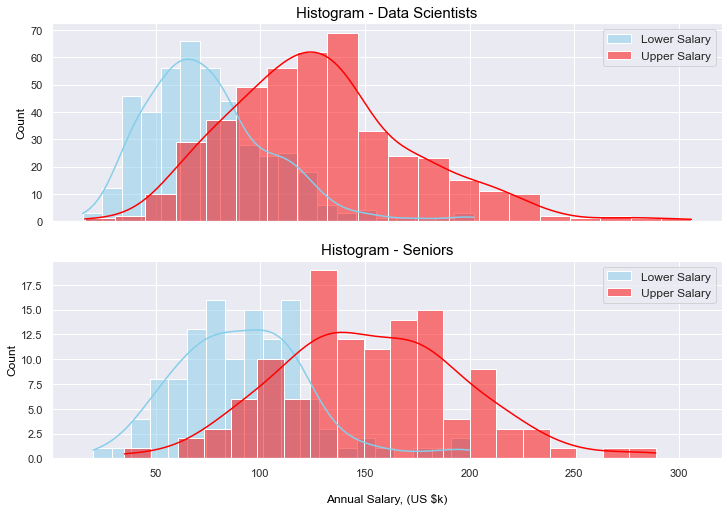

In [23]:
sns.set(style = 'darkgrid')

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

plt.xlabel('Annual Salary, (US $k)', color = 'black', fontsize = 12, labelpad = 15)

ax1 = sns.histplot(ax = axes[0], x = data_scientist['Lower Salary'], color = 'skyblue', label = 'Lower Salary', kde = True, bins = 20)
ax1 = sns.histplot (ax = axes[0], x = data_scientist['Upper Salary'], color = 'red', label = 'Upper Salary', kde = True, bins = 20)
axes[0].set_title('Histogram - Data Scientists', fontsize = 15, color = 'black')
axes[0].set_ylabel('Count', color = 'black', fontsize = 12)
ax1.legend(fontsize = 12)

ax2 = sns.histplot(ax = axes[1], x = seniors['Lower Salary'], color = 'skyblue', label = 'Lower Salary', kde = True, bins = 20)
ax2 = sns.histplot (ax = axes[1], x = seniors['Upper Salary'], color = 'red', label = 'Upper Salary', kde = True, bins = 20)
axes[1].set_title('Histogram - Seniors', fontsize = 15, color = 'black')
axes[1].set_ylabel('Count', color = 'black', fontsize = 12)
ax2.legend(fontsize = 12)


plt.subplots_adjust(hspace=0.2)
plt.show()

## Boxplot of Salaries

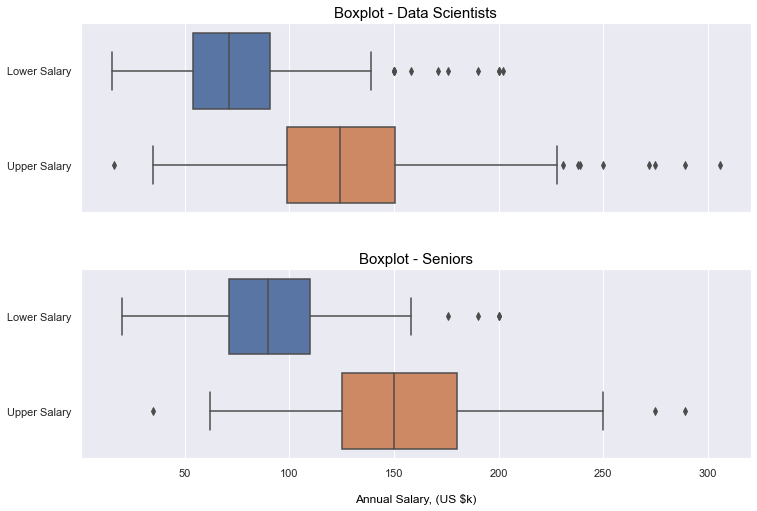

In [24]:
sns.set(style = 'darkgrid')

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

plt.xlabel('Annual Salary, (US $k)', color = 'black', fontsize = 12, labelpad = 15)

ax1 = sns.boxplot(ax = axes[0], data = data_scientist, order = ['Lower Salary', 'Upper Salary'], orient = 'h')
axes[0].set_title('Boxplot - Data Scientists', fontsize = 15, color = 'black')

ax2 = sns.boxplot(ax = axes[1], data = seniors, order = ['Lower Salary', 'Upper Salary'], orient = 'h')
axes[1].set_title('Boxplot - Seniors', fontsize = 15, color = 'black')

plt.subplots_adjust(hspace=0.3)
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>It's possible to see by both graphic types that, as expected, the salaries for 'Senior' positions are in general higher than those for the previously definied 'Data Scientist'. Is there a pattern in the range of salaries?</p>

## Regplot of Salary Correlations

In [25]:
data_scientist.corr().round(4)

,Lower Salary,Upper Salary
Lower Salary,1.0000,0.9403
Upper Salary,0.9403,1.0000


In [26]:
seniors.corr().round(4)

,Lower Salary,Upper Salary
Lower Salary,1.0000,0.9108
Upper Salary,0.9108,1.0000


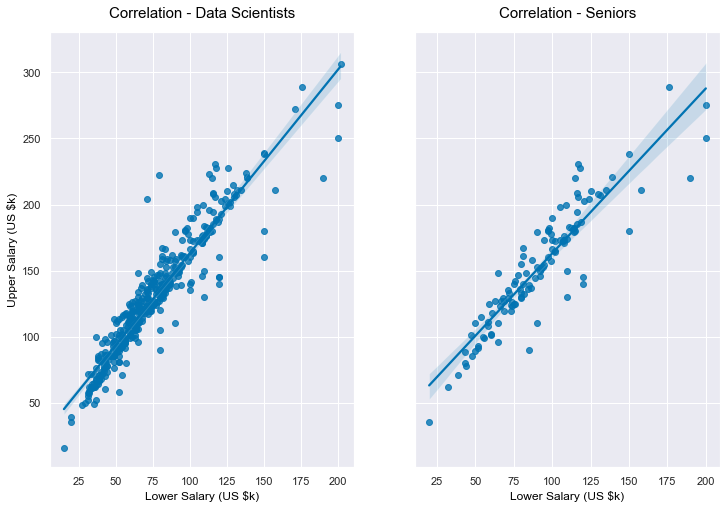

In [27]:
sns.set(style = 'darkgrid')
sns.set_palette("colorblind")

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,8))

ax1= sns.regplot(ax = axes[0], x="Lower Salary", y="Upper Salary", data=data_scientist)
ax1.set_title('Correlation - Data Scientists', color = 'black', fontsize = 15, y =1.02)
axes[0].set_xlabel('Lower Salary (US $k)', color = 'black', fontsize = 12)
axes[0].set_ylabel('Upper Salary (US $k)', color = 'black', fontsize = 12)

ax2= sns.regplot(ax = axes[1], x="Lower Salary", y="Upper Salary", data=seniors)
ax2.set_title('Correlation - Seniors', color = 'black', fontsize = 15, y =1.02)
axes[1].set_xlabel('Lower Salary (US $k)', color = 'black', fontsize = 12)
axes[1].set_ylabel(' ', color = 'black', fontsize = 12)


plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>There's a clearly high correlation between the salary range - Upper and Lower - among different companies. The highest correlation is observed in the 'Data Scientist' dataset. By the way, what are the top 10 sectors of the companies in the USA hiring Data Scientists?</p>

## Barplot of Sectors and Skills

In [28]:
sectors = dataset.copy()
sectors['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [29]:
sectors = sectors[sectors['Sector'] != '-1']
top10_sectors = sectors['Sector'].value_counts().iloc[:10]
top10_sectors

Information Technology       122
Business Services             70
Biotech & Pharmaceuticals     58
Insurance                     41
Finance                       25
Health Care                   23
Aerospace & Defense           20
Manufacturing                 17
Education                     13
Retail                         8
Name: Sector, dtype: int64

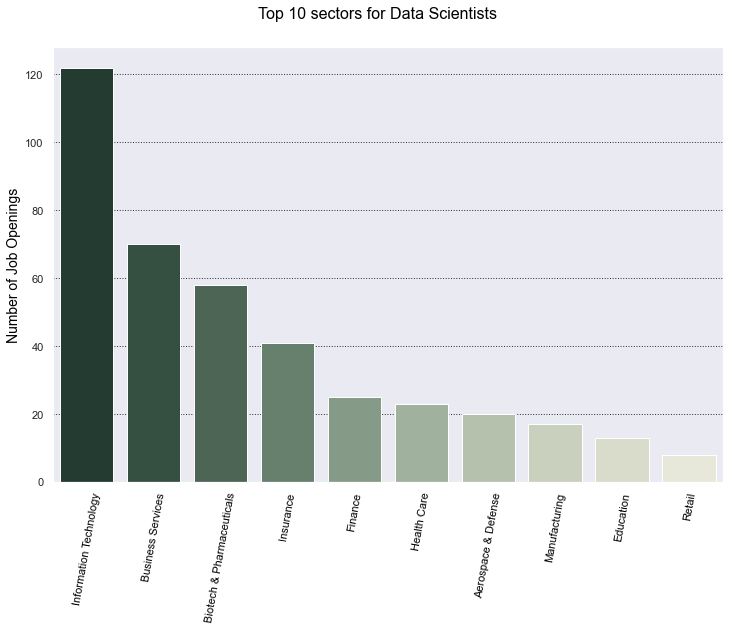

In [30]:
sns.set_style('darkgrid', {"grid.color": ".2", "grid.linestyle": ":"})

ax = sns.barplot(x = top10_sectors.index, y = top10_sectors.values, palette = 'YlGn_r', saturation = 0.25)
ax.figure.set_size_inches(12, 8)
ax.figure.suptitle('Top 10 sectors for Data Scientists', color = 'black', fontsize = 16, y = 0.95)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, color = 'black')
ax.set_ylabel('Number of Job Openings', color = 'black', fontsize = 14)

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>The major part of the Data Scientists job openings - around 30% - refers to the 'Information Technology' sector, yet other sectors are currently of great importance for this career, as shown in the graphic. Let's find out what are the most demanded skills for Data Scientists:</p>

In [31]:
skills = dataset.copy()
skills = dataset.loc[:, 'Python': 'google_an']
skills.head()

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
index,,,,,,,,,,,,,,,,
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [32]:
list_0 = []
list_1 = []
for column in skills:
    series_count = skills[column].value_counts()
    list_0.append(series_count[0])
    list_1.append(series_count[1])

skills = pd.DataFrame(data = (list_0, list_1), index = ['not required', 'required'], columns = skills.columns)
skills = skills.T
skills['total'] = skills['not required'] + skills['required']
skills['required (%)'] = round(100 * skills['required'] / skills['total'], 2)
skills = skills.sort_values("required", ascending=False)
skills

,not required,required,total,required (%)
Python,197,258,455,56.70
sql,201,254,455,55.82
excel,208,247,455,54.29
aws,344,111,455,24.40
spark,345,110,455,24.18
tableau,356,99,455,21.76
hadoop,373,82,455,18.02
tensor,408,47,455,10.33
sas,414,41,455,9.01
bi,416,39,455,8.57


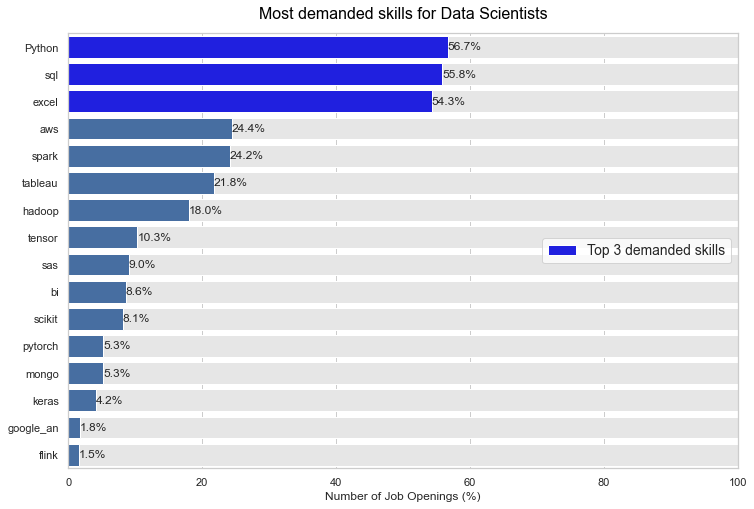

In [33]:
sns.set_theme(style = 'whitegrid')

f, ax = plt.subplots(figsize = (12, 8))

sns.set_color_codes('pastel')
sns.barplot(x = 'total', y = skills.index, data = skills, color = '0.9')

sns.set_color_codes('muted')
top3 = ['blue' if (x > 50) else '#386cb0' for x in skills['required (%)']]
sns.barplot(x = 'required (%)', y = skills.index, data = skills,
            label = 'Top 3 demanded skills', palette = top3)

ax.legend(ncol = 1, loc = 'right', frameon = True, fontsize = 14)
ax.set(xlim = (0, 100), ylabel = "", xlabel = 'Number of Job Openings (%)')
ax.set_title('Most demanded skills for Data Scientists', color = 'black', fontsize = 16, y = 1.02)
ax.bar_label(ax.containers[1], fmt = '%1.1f%%')

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>For our Data Scientist definition, the three most demanded skills one should consider improving/learning according to the 2021 job openings in USA are Python, SQL and Excel. However it's always important to check the specifics for each job vacancy and be aware that a career in data science requires continuously improvement. To conclude, let's verify the distribuition of Data Scientist Salaries by US State: </p>


## Geoplot of Salaries by US States

In [34]:
locations = dataset.copy()
locations = locations.rename(columns={'Job Location': 'STUSPS'})

In [35]:
import geopandas as gpd

path = 'cb_2020_us_state_500k'

geo_usa = gpd.read_file(path)

In [36]:
geo_states = geo_usa.merge(locations, on = 'STUSPS')
geo_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Location,Size,Type of ownership,Sector,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title,seniority_by_title,Degree
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...","Albuquerque, NM",501 - 1000,Company - Private,Aerospace & Defense,53,91,72.0,Tecolote Research,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...","Albuquerque, NM",5001 - 10000,Company - Public,Biotech & Pharmaceuticals,56,95,75.5,Sartorius,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...","San Jose, CA",201 - 500,Company - Private,Business Services,86,142,114.0,Logic20/20,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,data scientist,na,M
3,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...","San Jose, CA",501 - 1000,Company - Private,Retail,126,201,163.5,Wish,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...","Mountain View, CA",201 - 500,Company - Private,Information Technology,118,189,153.5,h2o.ai,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,data scientist,na,M


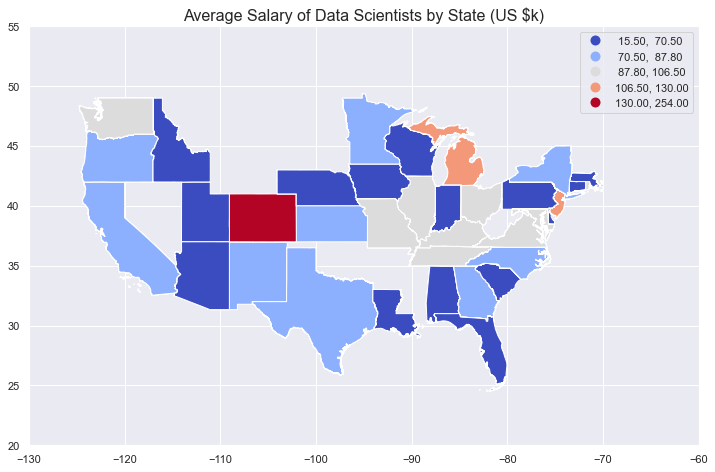

In [37]:
sns.set_theme(style = 'darkgrid')

geo_states.plot(column = 'Avg Salary(K)', scheme = 'Quantiles', figsize = (12, 8), legend = True, cmap = 'coolwarm')
plt.xlim(-130, -60)
plt.ylim(20, 55)

plt.title('Average Salary of Data Scientists by State (US $k)', fontsize = 16)
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>In this work, we were able to understand the differences among Data Scientist job openings. We built the frequency distribution of the salaries and we made a parallel with senior positions. It was shown that there is a high correlation between the salary range in the job vacancies. Lastly, we understood what are the most demanded sectors and skills for Data Scientists.</p>